In [2]:
from IPython.display import clear_output
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
cmap = ListedColormap(['white', 'yellow', 'red'])

In [4]:
class Board :
  def __init__(self, rows ,columns) :
    self.rows = rows
    self.columns = columns
    self.board = [['O' for i in range(columns) ] for j in range(rows)]

  def showboard(self):
    color_dict = {'O' : 0, 'Y': 1, 'R': 2}
    img = []
    for r in self.board :
      img.append([color_dict[cell] for cell in r])
    plt.figure()
    for i in range(-1, self.rows) :
      plt.axhline(i+0.5, c='black')
    for i in range(-1, self.columns) :
      plt.axvline(i+0.5, c='black')
    plt.imshow(img, cmap=cmap)
    plt.tight_layout()
    plt.show()

  def col_available(self) :
    return([elem=='O' for elem in self.board[0]])

  def cells_available(self) :
    res = []
    cols = self.col_available()
    for col, playable in enumerate(cols) :
      found = False
      if playable :
        for row in range(self.rows-1, -1, -1) :
          if self.board[row][col]=='O' and not found :
            found = True
            res.append((row, col))
    return(res)
  
  def neighbors(self, row, col, color) :
    comp = 0
    directions = [(1,0), (1,1), (0,1), (-1,1), (-1,0), (-1,-1), (0,-1), (1,-1)]
    for x,y in directions :
      if 0<=row+x<self.rows and 0<=col+y<self.columns :
        if self.board[row+x][col+y]==color :
          comp +=1
    return(comp)
  
  def look_in_dir(self, cell, dir, color) :
    row, col = cell
    dist_max = 0
    x,y = dir
    for dist in range(1, 4) :
      if 0<=row+dist*x<self.rows and 0<=col+dist*y<self.columns :
        if self.board[row+dist*x][col+dist*y]==color :
          dist_max=dist
        else :
          break
    return(dist_max)
  
  def win_in_one(self, color) :
    cells = self.cells_available()
    directions = [(1,0), (1,1), (0,1), (1,-1)]
    res = []
    for cell in cells :
      for dir in directions :
        if self.look_in_dir(cell, dir, color)+self.look_in_dir(cell, (-dir[0], -dir[1]), color)>=3 :
          res.append(cell[1])
    return(res)

  def is_full(self) :
    return(not np.array(self.cells_available()).any())

  def play(self, column, color) :
    if color not in ["R", "Y"] :
      print("please enter a valid color (Y or R")
      return False
    if not 0<=column<self.columns :
      print("please enter a valid column")
      return False
    for row in range(self.rows-1, -1, -1) :
      if self.board[row][column] == 'O' :
        self.board[row][column] = color
        return True
    return False

  def win(self):
    directions= [(1,0),(-1,0),(0,1),(0,-1),(1,1),(-1,-1),(-1,1),(1,-1)]
    for row in range(self.rows) :
      for column in range(self.columns) :
        if self.board[row][column] != "O" :
          for x,y in directions :
            for step in range(1,4) :
              next_row = row+x*step
              next_column = column+y*step
              if 0<=next_column<self.columns and 0<=next_row<self.rows :
                if self.board[row][column]==self.board[next_row][next_column] :
                  if step==3 :
                    return True
                else :
                  break
    return False

In [5]:
def main() :
  columns = int(input("enter a number of column : "))
  rows = int(input("enter a number of row : "))
  winner = False
  current_player = "R"
  board = Board(rows,columns)
  while not winner :
    clear_output()
    board.showboard()
    if board.is_full() :
      print("Too bad, that's a tie")
      break
    column= int(input("enter column : "))
    if board.play(column,current_player) :
      winner = board.win()
      if winner :
        clear_output()
        board.showboard()
        print (f"Congratulations {current_player}, you have just won 100 000 $")
        break
      current_player = "Y" if current_player == "R" else "R"

In [6]:
class AI_One :
    def __init__(self, c) :
        self.__color = c
    
    def get_color(self) :
        return(self.__color)
    
    def set_color(self, new_c) :
        self.__color = new_c
    
    def col_to_play(self, board) :
        color = self.get_color()
        opp_color = 'R' if color=='Y' else 'Y'
        win_next = board.win_in_one(color)
        win_next_opp = board.win_in_one(opp_color)
        if len(win_next)!=0 :
            print(f'AI can win now in col {win_next[0]}')
            return(win_next[0])
        if len(win_next_opp)!=0 :
            print(f'Player can win now in col {win_next_opp[0]}')
            return(win_next_opp[0])
        cells = board.cells_available()
        n_max = 0
        lst_col = []
        for row, col in cells :
            n_neighbors = board.neighbors(row, col, color)
            if n_neighbors==n_max :
                lst_col.append(col)
            elif n_neighbors>n_max :
                n_max = n_neighbors
                lst_col = [col]
        print(lst_col)
        res = choice(lst_col, 1)
        return(int(res))


In [7]:
def main_IA() :
  columns = int(input('Number of column :'))
  rows = int(input('Number of row :'))
  player_turn = input('Wanna play first ? (enter Y or N)')=='Y'
  ai = AI_One('R') if player_turn else AI_One('Y')
  winner = False
  current_player = 'Y'
  board = Board(rows,columns)
  while not winner :
    board.showboard()
    print('Y :', board.win_in_one('Y'))
    print('R :', board.win_in_one('R'))
    if board.is_full() :
      print("Too bad, that's a tie")
      break
    if player_turn :
      column = int(input('enter column : '))
      clear_output()
      player_turn = False
    else :
      column = ai.col_to_play(board)
      print(f'AI plays in column {column}')
      player_turn = True
    if board.play(column,current_player) :
      winner = board.win()
      if winner :
        clear_output()
        board.showboard()
        print (f"congratulations {current_player}, you have just won 100 000 $")
        break
      current_player = "Y" if current_player == "R" else "R"

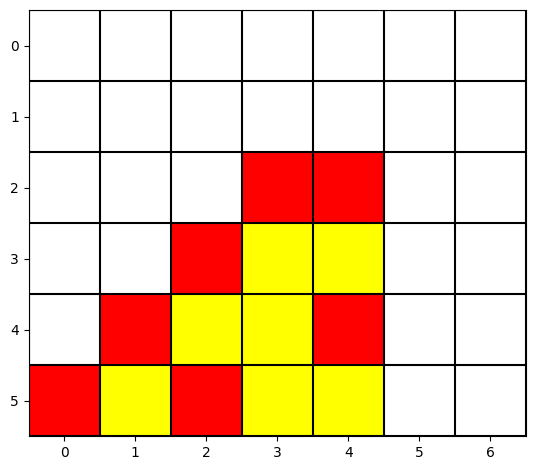

congratulations R, you have just won 100 000 $


In [8]:
main_IA()